In [46]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime
import matplotlib.pyplot as plt

In [47]:
# Pull the list of utility stock tickers from wikepedia
# store them in utlilities tickers
import requests
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
text = response.text
from bs4 import BeautifulSoup
soup = BeautifulSoup(text)
tag_list = soup.find_all("tr")
utilities_tickers = list()
for tag in tag_list:
    try:
        if tag.find_all('td')[2].get_text() == 'Utilities':
            utilities_tickers.append(tag.find_all('td')[0].get_text().replace("\n", ""))        
    except IndexError:
        pass

In [48]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

start_date = dt.datetime(1960, 1, 1)
end_date = dt.datetime(2023, 1, 1)

utilities_stock_data = dict()

for ticker in utilities_tickers:
    df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    df = df.reset_index()
    df['Date'] =  pd.to_datetime(df['Date'])
    utilities_stock_data[ticker] = df

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [21]:
#Add S&P500 and Nasdaq data
market_ticker = 'SPY'
spy_data = pdr.get_data_yahoo(market_ticker, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [22]:
import requests
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"
response = requests.get(url)
text = response.text
from bs4 import BeautifulSoup
soup = BeautifulSoup(text)
tag_list = soup.find_all("tr")
spy_tickers = list()
i=0
for tag in tag_list:
    i+=1
    if i > 503:
        break
    try:
        spy_tickers.append(tag.find_all('td')[0].get_text().replace("\n", ""))        
    except IndexError:
        pass

In [23]:
import datetime as dt
from pandas_datareader import data as pdr
import yfinance as yfin

yfin.pdr_override()

start_date = dt.datetime(2008, 1, 1)
end_date = dt.datetime(2023, 4, 1)

spy_stock_data = dict()

for ticker in spy_tickers:
    print(ticker)
    df = pdr.get_data_yahoo(ticker, start=start_date, end=end_date)
    df = df.reset_index()
    df['Date'] =  pd.to_datetime(df['Date'])

        
    spy_stock_data[ticker] = df

MMM
[*********************100%***********************]  1 of 1 completed
AOS
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADM
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
ADP
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%********************

[*********************100%***********************]  1 of 1 completed
GM
[*********************100%***********************]  1 of 1 completed
GPC
[*********************100%***********************]  1 of 1 completed
GILD
[*********************100%***********************]  1 of 1 completed
GL
[*********************100%***********************]  1 of 1 completed
GPN
[*********************100%***********************]  1 of 1 completed
GS
[*********************100%***********************]  1 of 1 completed
HAL
[*********************100%***********************]  1 of 1 completed
HIG
[*********************100%***********************]  1 of 1 completed
HAS
[*********************100%***********************]  1 of 1 completed
HCA
[*********************100%***********************]  1 of 1 completed
PEAK
[*********************100%***********************]  1 of 1 completed
HSIC
[*********************100%***********************]  1 of 1 completed
HSY
[*********************100%***********************] 

[*********************100%***********************]  1 of 1 completed
TFX
[*********************100%***********************]  1 of 1 completed
TER
[*********************100%***********************]  1 of 1 completed
TSLA
[*********************100%***********************]  1 of 1 completed
TXN
[*********************100%***********************]  1 of 1 completed
TXT
[*********************100%***********************]  1 of 1 completed
TMO
[*********************100%***********************]  1 of 1 completed
TJX
[*********************100%***********************]  1 of 1 completed
TSCO
[*********************100%***********************]  1 of 1 completed
TT
[*********************100%***********************]  1 of 1 completed
TDG
[*********************100%***********************]  1 of 1 completed
TRV
[*********************100%***********************]  1 of 1 completed
TRMB
[*********************100%***********************]  1 of 1 completed
TFC
[*********************100%***********************

In [30]:
# filter data into monthly data (1st of month) and add pct change in returns -s&p data
for ticker in spy_stock_data:
    spy_stock_data[ticker] = spy_stock_data[ticker].set_index('Date')  
    spy_stock_data[ticker] = spy_stock_data[ticker].resample('M').last()
    spy_stock_data[ticker]['pct change'] = spy_stock_data[ticker]['Adj Close'].pct_change()

NameError: name 'spy_stock_data' is not defined

In [49]:
# utilities data
for ticker in utilities_stock_data:
    utilities_stock_data[ticker]= utilities_stock_data[ticker].set_index('Date')
    utilities_stock_data[ticker] = utilities_stock_data[ticker].resample('M').last()
    utilities_stock_data[ticker]['pct change'] = utilities_stock_data[ticker]['Adj Close'].pct_change()

In [50]:
pop = ['AES', 'AEE', 'CEG', 'AWK', 'CMS', 'FE', 'NRG', 'SRE'] # cutoff around ~400 months of data
for p in pop: 
    utilities_stock_data.pop(p)

In [51]:
# store data in dataframe
data = {}
for ticker in utilities_stock_data:
    data[ticker] = utilities_stock_data[ticker]['pct change']
utilities_returns = pd.DataFrame(data)
utilities_returns = utilities_returns.set_index(utilities_stock_data['AEP'].index)
utilities_returns = utilities_returns.iloc[1: , :]
utilities_returns = utilities_returns.dropna()
utilities_returns

,LNT,AEP,ATO,CNP,ED,D,DTE,DUK,EIX,ETR,...,EXC,NEE,NI,PCG,PNW,PPL,PEG,SO,WEC,XEL
Date,,,,,,,,,,,,,,,,,,,,,
1984-01-31,0.000000,0.072993,0.000000,0.032258,0.010102,0.067797,0.018182,-0.009950,-0.025157,0.009345,...,0.043480,-0.009316,-0.034189,0.008403,-0.006451,0.042425,0.027473,-0.003140,0.004546,-0.026316
1984-02-29,-0.035088,-0.052499,0.022556,-0.028244,-0.070190,-0.095239,0.000000,-0.068241,-0.054839,0.037037,...,-0.012878,-0.065570,-0.008849,-0.075000,-0.019481,0.005813,-0.083845,-0.055117,-0.072398,-0.027027
1984-03-31,-0.059091,-0.029629,0.029412,0.019867,0.054945,0.011697,-0.051106,0.060773,-0.004815,-0.032156,...,0.008771,0.020618,-0.017857,-0.043465,-0.046357,-0.057803,-0.012049,0.024999,0.014635,-0.031250
1984-04-30,0.019324,0.007634,-0.057143,0.025974,0.031251,0.080925,-0.058253,-0.015625,0.056338,-0.057144,...,-0.104348,0.026937,0.000000,0.029126,-0.104167,0.018405,0.085367,0.008130,0.028845,0.025090
1984-05-31,0.004739,-0.019454,0.000000,-0.026792,0.016499,-0.069519,0.041238,-0.002049,-0.033333,0.020203,...,-0.008134,-0.034740,-0.063636,0.018868,0.062016,0.054217,-0.028090,-0.036545,0.009346,0.024475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,0.001805,0.024625,-0.060576,0.000436,-0.007595,-0.002196,0.000307,-0.018510,0.000000,0.009997,...,-0.048458,0.011629,-0.029276,0.135359,0.025589,0.000000,-0.019948,0.011168,0.000471,0.014621
2022-09-30,-0.131881,-0.137226,-0.101693,-0.106248,-0.122570,-0.148178,-0.111286,-0.129922,-0.155475,-0.127233,...,-0.146891,-0.078180,-0.146391,0.013788,-0.143862,-0.121587,-0.119246,-0.117685,-0.132926,-0.132408
2022-10-31,-0.007126,0.017004,0.046146,0.015259,0.025653,0.012444,-0.025554,0.001720,0.061152,0.064692,...,0.030166,-0.011606,0.029384,0.194400,0.055218,0.044970,-0.002845,-0.037059,0.021246,0.017344


Original attempt was to create custom market factors for within the S&P universe. After extensive searching it was found impossible to collect the data required without paying for a service. Therefore an alternative method of evaluating the factor model was required. 

* Chose to implement Asness and Frazzini's HML calculation, and see how it performs not just in 5 factor (as in their literature) but also for 3 factor and 6 factor

Exploring the difference between Fama French factors vs Asness and Frazzini factors as explained in Asness, C.S, and Frazzini, A. (2013), The Devil in HML’s Details. 

Information on paper can be found: `https://www.aqr.com/Insights/Research/Journal-Article/The-Devil-in-HMLs-Details`

Paper can be found: `https://www.iijournalseprint.com/JPM/AQR/Sum13DevilinHMLsDetails05t/index.html`

Data can be found: `https://www.aqr.com/Insights/Datasets/The-Devil-in-HMLs-Details-Factors-Monthly`

The Journal of Portfolio Management, Vol. 39, No. 4, pp. 49-68

# 3 Factor Model FF vs Asness and Frazzini

In [52]:
factor_df = pd.read_csv('factor_FF_devil.csv', index_col=0)
factor_df.index = pd.to_datetime(factor_df.index, format='%Y%m') + datetime.timedelta(days=-1)
factor_df['HML devil'] = factor_df['HML devil'] * 100
factor_df

,MKT,SMB,HML FF,HML devil,RMW,CMA,RF,MOM,STR
Date,,,,,,,,,
1963-06-30,-0.39,-0.41,-0.97,-0.59,0.68,-1.18,0.27,0.90,-0.08
1963-07-31,5.07,-0.80,1.80,0.28,0.36,-0.35,0.25,1.01,1.30
1963-08-31,-1.57,-0.52,0.13,0.27,-0.71,0.29,0.27,0.19,1.19
1963-09-30,2.53,-1.39,-0.10,-2.11,2.80,-2.01,0.29,3.12,-0.66
1963-10-31,-0.85,-0.88,1.75,0.91,-0.51,2.24,0.27,-0.74,1.12
...,...,...,...,...,...,...,...,...,...
2022-08-31,-9.35,-0.97,0.06,-2.74,-1.51,-0.84,0.19,3.47,-1.61
2022-09-30,7.83,1.86,8.05,5.02,3.07,6.52,0.23,3.87,0.33
2022-10-31,4.60,-2.67,1.38,2.41,6.01,3.11,0.29,-2.01,0.55


In [53]:
def sampleMeanVariant(sigmahat, muhat, rf, kappa):
    e = np.ones((sigmahat.shape[0], 1))
    H = (muhat - rf*e).T @ np.linalg.inv(sigmahat) @ (muhat - rf*e)
    aStar = (kappa-rf)/H * np.linalg.inv(sigmahat) @ (muhat - rf*e)
    return aStar

In [54]:
def factorModel(returns, factorDF, rf, kappa, numFactors):
    """ 
    returns - monthly returns dataframe of each equity (m,d)
    factorDF - df of excess market returns, SMB, HML
    rf - series of rf rate
    kappa - targeted expected return for portfolio
    numFactors - the number of factors in the model
    """

    d = returns.shape[1]
    # Compute the excess returns of each asset
    excess_returns = returns.sub(rf,axis=0).values

    # Define arrays to store the beta coefficients and residual variances
    betas = np.zeros((d, numFactors))
    residual_variances = np.zeros((d))

    # Perform the OLS regression for each asset
    for i in range(d):
        # Extract the excess returns of the i-th asset
        excess_asset_returns = excess_returns[:,i]

        # Define the OLS model with the R-rf ~ MF-rf + SMB + HML
        model = sm.OLS(excess_asset_returns,
                       sm.add_constant(factorDF))

        # Fit the model and extract the regression coefficients and residuals
        results = model.fit()
        beta = results.params[1:]
        residuals = results.resid

        # Store the beta coefficients and residual variance for the i-th asset
        betas[i] = beta
        residual_variances[i] = np.var(residuals, ddof=numFactors + 1)
        
    sigmaFactor = np.cov(factorDF.T)
    Dhat = np.diag(residual_variances)
    sigmahat = betas@sigmaFactor@betas.T + Dhat
    muhat = returns.mean(axis=0).values.reshape((-1, 1))
    
    # pass most recent rf 
    return sampleMeanVariant(sigmahat, muhat, rf[-1], kappa)

### See how FF HML allocation compares to Asness and Frazzini HML allocation in 3 Factor

In [55]:
AF_factorDF = factor_df[['MKT', 'SMB', 'HML devil']].loc['1/31/1984':'12/31/2022']
rf_DF = factorDF['RF'].loc['1/31/1984':'12/31/2022']
AF_a = factorModel(utilities_returns, AF_factorDF, rf_DF, kappa=.12,numFactors=3)
print(sum(AF_a))
AF_a

[0.6825844]


array([[0.03095306],
       [0.031391  ],
       [0.03193171],
       [0.03104169],
       [0.03231155],
       [0.03245342],
       [0.03174985],
       [0.03156466],
       [0.03054576],
       [0.03090855],
       [0.03030391],
       [0.03152593],
       [0.03081309],
       [0.03066204],
       [0.02895645],
       [0.03024903],
       [0.02846409],
       [0.03171087],
       [0.03113964],
       [0.03143079],
       [0.03191451],
       [0.0305628 ]])

In [56]:
FF_factorDF = factor_df[['MKT', 'SMB', 'HML FF']].loc['1/31/1984':'12/31/2022']
FF_a = factorModel(utilities_returns, FF_factorDF, rf_DF, kappa=.12, numFactors=3)
print(sum(FF_a))
FF_a

[0.68258868]


array([[0.03086392],
       [0.03132566],
       [0.03179416],
       [0.03095074],
       [0.03290863],
       [0.03226388],
       [0.03134685],
       [0.03130299],
       [0.02952275],
       [0.03068362],
       [0.03116101],
       [0.03110037],
       [0.03090402],
       [0.03093226],
       [0.03002306],
       [0.02916955],
       [0.02859939],
       [0.03217836],
       [0.0315789 ],
       [0.03124656],
       [0.03193259],
       [0.03079943]])

### Rolling Window

In [61]:
def roll_factor(d, M, T, returns, factors):
    '''
    d: number of assets
    M: size of window in terms of months
    T: total number of periods
    returns: T x d dataframe of returns for d assets for T total periods
    factors: factors to be used in factor model
    '''
       
    X = np.zeros(T-M)
    dates = pd.to_datetime(returns.index)
    
    for t in range(M,T):
        # get training and testing set
        start = dates[t-M]
        end = dates[t]
        R_train = returns.loc[start:end]
        R_test = returns.loc[end]
        
        # apply factor model
        rf = factorDF['RF'].loc[start:end]
        
        # get allocation weights
        a = factorModel(R_train, factor_df[factors].loc[start:end], rf, kappa=0.12, numFactors=len(factors))
    
        # get return of next period
        X[t-M] = a.T @ R_test + (1 - np.sum(a)) * rf[-1]
    
    return X

In [67]:
d = len(utilities_returns.columns)
M_range = [1*12, 2*12, 5*12, 8*12, 10*12] # 1, 2, 5, 8, 10, year windows
T = len(utilities_returns)

In [70]:
def compare_FF_devil(factors, horizon):
    '''
    factors: a list of factors without HML
    horizon: investment horizon in terms of years
    '''
    FF_factors = factors.copy()
    FF_factors.append('HML FF')
    AF_factors = factors.copy()
    AF_factors.append('HML devil')
    
    for m in M_range:
        FF = roll_factor(d, m, T, utilities_returns, FF_factors)
        AF = roll_factor(d, m, T, utilities_returns, AF_factors)
        
        # benchmark 1
        # benchmark 2
        
        plt.axhline(y = np.mean(FF), color = 'blue', linestyle = '-')
        plt.axhline(y = np.mean(AF), color = 'orange', linestyle = '-')
        
        # add benchmark data to df here
        df = pd.DataFrame({'FF':FF, 'AF':AF})
        df = df.rolling(horizon * 12).mean() # 10 year investment horizon
        
        plt.plot(np.arange(m,T), df['FF'], label='FF m=%d' % m)
        plt.plot(np.arange(m,T), df['AF'], label='AF m=%d' % m)
        # plot benchmarks from dataframe here with labels
        plt.xlim([0, T])
        plt.title('%d-Factor Model for m=%d' % (len(factors+1), m))
        plt.legend()
        plt.show()     

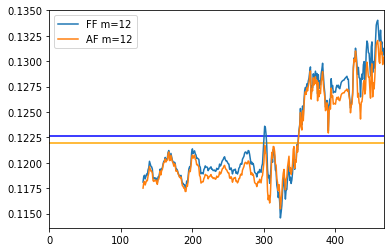

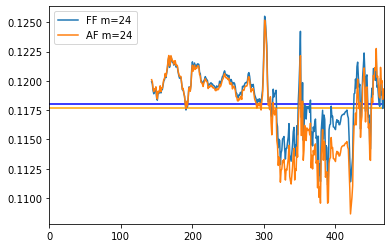

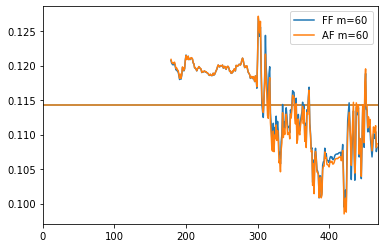

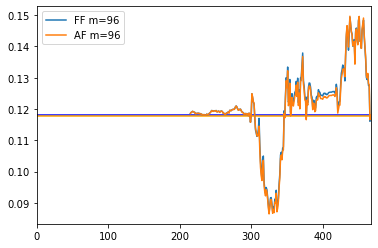

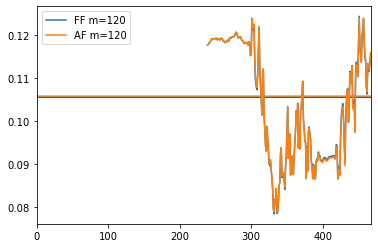

In [71]:
compare_FF_devil(['MKT','SMB'])

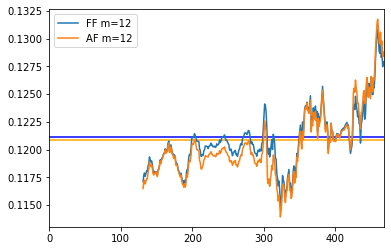

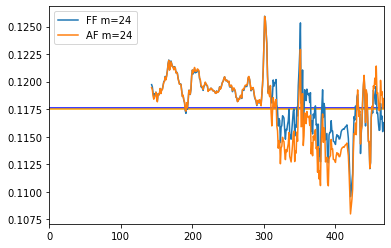

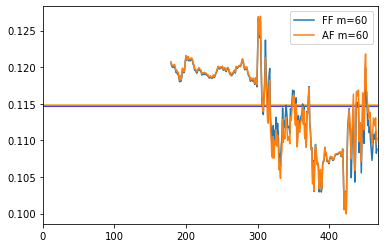

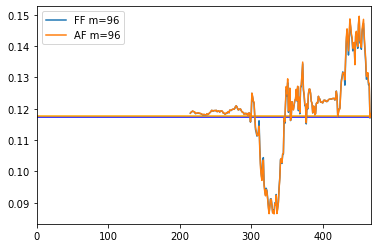

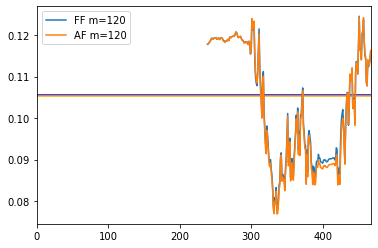

In [72]:
compare_FF_devil(['MKT','SMB','RMW', 'CMA'])

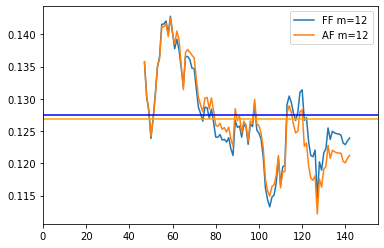

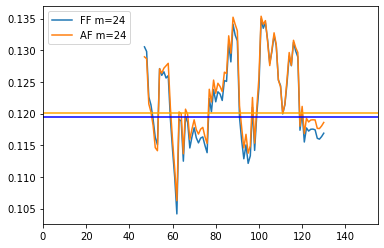

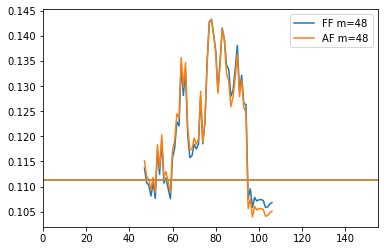

In [205]:
compare_FF_devil(['MKT','SMB','MOM', 'STR'])

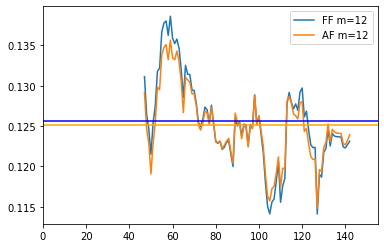

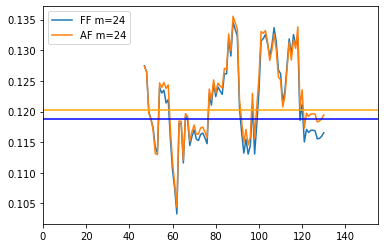

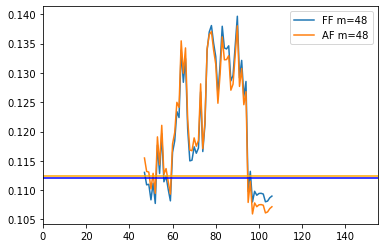

In [206]:
compare_FF_devil(['MKT','SMB','RMW', 'CMA', 'MOM'])

### 5 or 6 factor implementation should be identical and should be able to actually use the same function

# Things to Look into:

1. Devil vs FF performance in 3 factor
2. Devil vs FF performance in 5 factor (use FF data for all 4 factors and just swap in devil vs not devil)
3. Devil vs FF performance in 6 factor (5 factor with momentum factor)
4. What is a good rolling window to use for calculation? 5 years back? 2 years? 1 year? how does our window choice effect returns? What is the optimal Window?
    * What does this say on how long the market stays constant for?


# Needed from code perspective:
* Overall loop to set lookback and run rolling window
* Data for 5 and 6 factor models
* Returns calculation given allocation provided by `factorModel`
* Performance Metrics 